In [1]:
!pip install rarfile
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
import rarfile
import os

# Set the path for the RAR file and the target directory to extract its contents
rar_path = '/content/set2.rar'  # Update with the path to your RAR file
target_dir = '/content/'  # Update with your desired extraction path

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Extract the RAR file
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(target_dir)

print("Extraction completed.")


Extraction completed.


In [3]:
import zipfile
import os

# Paths to the zip files
cleaned_zip_path = '/content/set2/cleaned.zip'  # Update with the path to your cleaned.zip file
noisy_zip_path = '/content/set2/noisy.zip'  # Update with the path to your noisy.zip file

# Target directory where you want to extract the zip files
# It will create separate subdirectories for 'cleaned' and 'noisy' within the 'set2' directory
extracted_dir_path = '/content/set2'
# Create subdirectories to keep things organized
cleaned_dir = os.path.join(extracted_dir_path, 'cleaned')
noisy_dir = os.path.join(extracted_dir_path, 'noisy')


In [4]:
os.makedirs(cleaned_dir, exist_ok=True)
os.makedirs(noisy_dir, exist_ok=True)

# Extract cleaned.zip
with zipfile.ZipFile(cleaned_zip_path, 'r') as zip_ref:
    zip_ref.extractall(cleaned_dir)

# Extract noisy.zip
with zipfile.ZipFile(noisy_zip_path, 'r') as zip_ref:
    zip_ref.extractall(noisy_dir)

print("Extraction completed.")

Extraction completed.


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [8]:
def load_images(folder_path, target_size=(100, 100)):
  images = []
  for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    img = cv2.resize(img, target_size) # Resize image
    images.append(img)
  return np.array(images)

In [9]:
clean_images = load_images('/content/set2/cleaned/train_cleaned')
noisy_images = load_images('/content/set2/noisy/train')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(noisy_images, clean_images,test_size=0.3, random_state=42)

In [11]:
def autoencoder_model():
  input_img = layers.Input(shape=(100, 100, 3))
  # Encoder
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  # Decoder
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

  x = layers.UpSampling2D((2, 2))(x)
  decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
  # Resize output to match input size
  decoded = tf.image.resize(decoded, (100, 100))
  autoencoder = models.Model(input_img, decoded)
  return autoencoder
model = autoencoder_model()
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856 

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 15s 3s/step - loss: 54894.5898 - val_loss: 54903.0586
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 3/10
4/4 [==============================] - 11s 2s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 4/10
4/4 [==============================] - 10s 3s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 5/10
4/4 [==============================] - 10s 3s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 6/10
4/4 [==============================] - 9s 2s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 7/10
4/4 [==============================] - 13s 3s/step - loss: 54799.7148 - val_loss: 54903.0586
Epoch 8/10
4/4 [==============================] - 13s 2s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 9/10
4/4 [==============================] - 10s 3s/step - loss: 54799.7109 - val_loss: 54903.0586
Epoch 10/10
4/4 [==============================] - 10s 3s/step - l

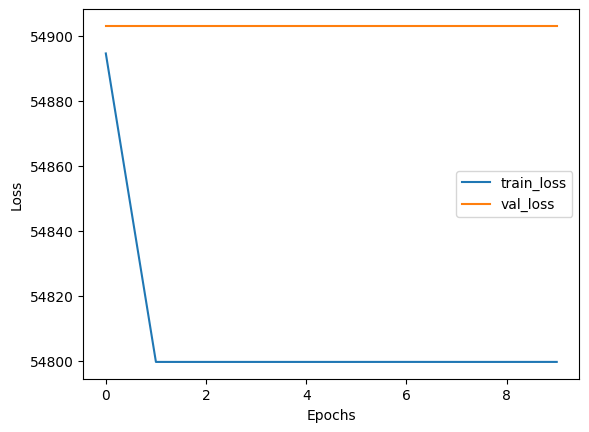

In [13]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
decoded_imgs = model.predict(X_test)

2/2 [==============================] - 2s 358ms/step


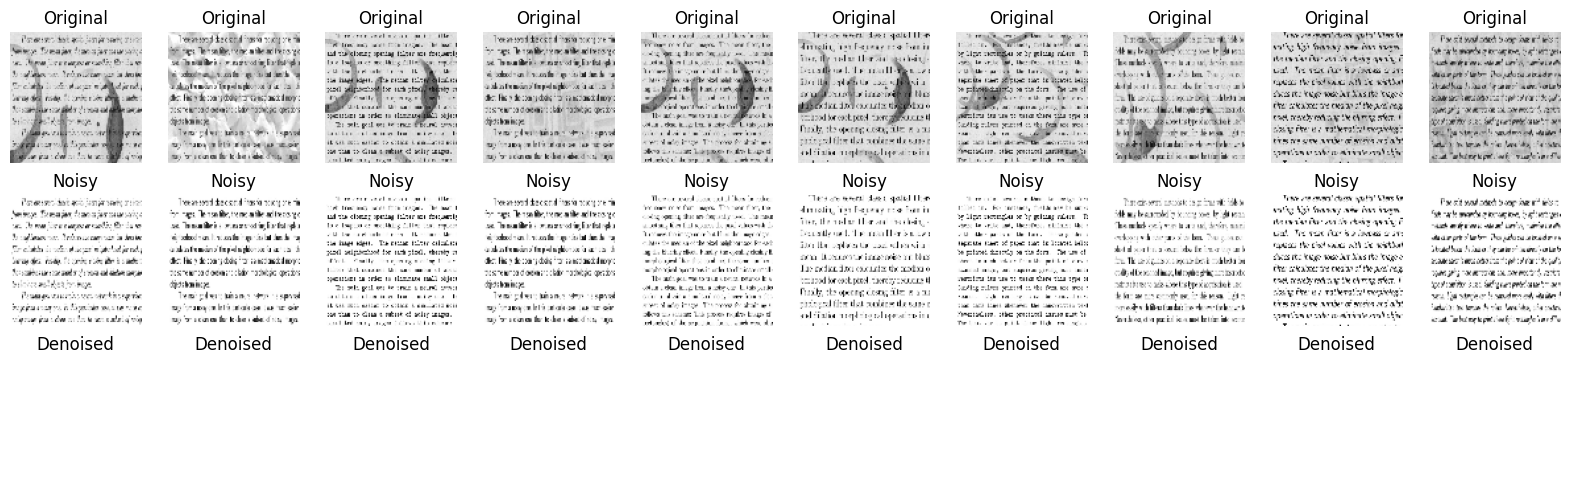

In [15]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # Original Images
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i])
  plt.title('Original')
  plt.axis('off')
  # Noisy Images
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(y_test[i])
  plt.title('Noisy')
  plt.axis('off')
  # Denoised Images
  ax = plt.subplot(3, n, i + 1 + 2*n)

  plt.imshow(decoded_imgs[i])
  plt.title('Denoised')
  plt.axis('off')
plt.show()

In [16]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds)
fold_train_losses = []
fold_val_losses = []

for fold, (train_indices, val_indices) in enumerate(kf.split(noisy_images)):
  print(f'Fold {fold + 1}/{num_folds}:')
  X_train_fold, X_val_fold = noisy_images[train_indices],noisy_images[val_indices]
  y_train_fold, y_val_fold = clean_images[train_indices],clean_images[val_indices]
  model = autoencoder_model()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32,validation_data=(X_val_fold, y_val_fold))
  fold_train_losses.append(history.history['loss'][-1])
  fold_val_losses.append(history.history['val_loss'][-1])

avg_train_loss = np.mean(fold_train_losses)
avg_val_loss = np.mean(fold_val_losses)
print(f'Average Training Loss Across Folds: {avg_train_loss}')
print(f'Average Validation Loss Across Folds: {avg_val_loss}')

Fold 1/5:
Epoch 1/10
4/4 [==============================] - 13s 3s/step - loss: 55026.0742 - val_loss: 54689.8281
Epoch 2/10
4/4 [==============================] - 11s 3s/step - loss: 54867.8516 - val_loss: 54688.1680
Epoch 3/10
4/4 [==============================] - 14s 4s/step - loss: 54867.3828 - val_loss: 54688.1680
Epoch 4/10
4/4 [==============================] - 13s 3s/step - loss: 54867.3789 - val_loss: 54688.1680
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 54867.3828 - val_loss: 54688.1680
Epoch 6/10
4/4 [==============================] - 11s 2s/step - loss: 54867.3789 - val_loss: 54688.1680
Epoch 7/10
4/4 [==============================] - 11s 3s/step - loss: 54867.3828 - val_loss: 54688.1680
Epoch 8/10
4/4 [==============================] - 11s 3s/step - loss: 54867.3789 - val_loss: 54688.1680
Epoch 9/10
4/4 [==============================] - 11s 3s/step - loss: 54867.3828 - val_loss: 54688.1680
Epoch 10/10
4/4 [==============================] - 12s

Inference The average training and validation losses across folds indicate the overall performance
of the model. If the average losses are consistent and low across folds, it suggests that the model
generalizes well to different subsets of the data, indicating robustness.
